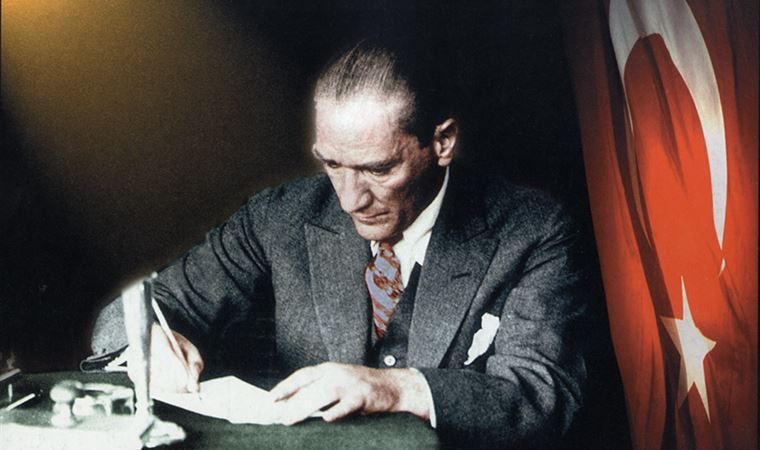

# Introduction

### Republic Day (29 October 1923)
Republic Day (Turkish: Cumhuriyet Bayramı) is a public holiday in Turkey commemorating the proclamation of the Republic of Turkey, on 29 October 1923. The annual celebrations start at 1:00 pm on 28 October and continue for 35 hours.

### Mustafa Kemal Ataturk
As the president of the newly formed Turkish Republic, Atatürk initiated a rigorous program of political, economic, and cultural reforms with the ultimate aim of building a modern, progressive and secular nation-state. He made primary education free and compulsory, opening thousands of new schools all over the country. He also introduced the Latin-based Turkish alphabet, replacing the old Ottoman Turkish alphabet. Turkish women received equal civil and political rights during Atatürk's presidency. In particular, women were given voting rights in local elections by Act no. 1580 on 3 April 1930 and a few years later, in 1934, full universal suffrage.

> ***Peace at Home, Peace in the World***

<font color = 'blue'>
Content: 

1. [Libraries](#1)
1. [Load and Check Data](#2)
1. [Data Preprocessing](#3)
1. [EDA - Visualization](#4) 
1. [Sentiment Analysis](#5)
1. [Topic Modeling](#6)
1. [References](#7)

<a id = "1"></a><br>
# 1. Libraries

In [1]:
# text mining libraries
library(tm)
library(NLP)
library(wordcloud)
library(syuzhet)
library(tidyverse)
library(quanteda)

# topic modeling libraries
install.packages("seededlda")
library(seededlda)
library(lubridate)
install.packages("spacyr")
library(spacyr)

# barplot
library(ggplot2)
library(gridExtra)
library(stringi)
library(knitr)
library(RWeka)
library(httr) 
library(dplyr)

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:httr’:

    content


Loading required package: RColorBrewer

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::annotate() masks NLP::annotate()
✖ NLP::content()      masks httr::content()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()

Package version: 3.0.0
Unicode version: 13.0
ICU version: 66.1

Parallel computing: 4 of 4 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘package:tm’:

    stopwords


The following objects are masked from ‘package:NLP’:

    meta, meta<-


Installing package i

<a id = "2"></a><br>
# 2. Load and Check Data

In [2]:
data <- readLines("../input/mka-english/nutuk_english.txt")

Warning message in readLines("../input/mka-english/nutuk_english.txt"):
“incomplete final line found on '../input/mka-english/nutuk_english.txt'”


In [3]:
str(data)

 chr [1:2951] "GHAZI MUSTAPHA KEMAL PASHA" "" ...


In [4]:
dataset <- "data"
wordcount_book <- stri_count_words(data)
data_linecount <- c(length(data))
data_wordcount <- c(sum(wordcount_book))
data_max_wordcount <- c(max(wordcount_book))
data_avg_wordcount <- c(mean(wordcount_book))
data_summary <- data.frame(dataset, data_linecount, data_wordcount, data_max_wordcount, data_avg_wordcount)
data_names <- c("Dataset", "Line Count", "Total Word Count", "Max Word Count", "Average Word Count")
kable(data_summary, digits = 1, col.names = data_names, align = 'c')



| Dataset | Line Count | Total Word Count | Max Word Count | Average Word Count |
|:-------:|:----------:|:----------------:|:--------------:|:------------------:|
|  data   |    2951    |      305405      |      504       |       103.5        |

In [5]:
# converting corpus
text_corpus <- Corpus(VectorSource(data))

<a id = "3"></a><br>
# 3. Data Preprocessing

In [6]:
toSpace <- content_transformer(function(x, pattern) gsub(pattern, "", x))
text_corpus <- tm_map(text_corpus, toSpace, "[^[:print:]]")
text_corpus <- tm_map(text_corpus, removePunctuation)
text_corpus <- tm_map(text_corpus, removeNumbers)

text_corpus <- tm_map(text_corpus, content_transformer(tolower))
text_corpus <- tm_map(text_corpus, stripWhitespace)
text_corpus_no_stopwords <- tm_map(text_corpus, removeWords, stopwords("english"))
text_corpus_no_stopwords <- tm_map(text_corpus_no_stopwords, stripWhitespace)

Warning message in tm_map.SimpleCorpus(text_corpus, toSpace, "[^[:print:]]"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text_corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text_corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text_corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text_corpus, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text_corpus, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text_corpus_no_stopwords, stripWhitespace):
“transformation drops documents”


<a id = "4"></a><br>
# 4. EDA - Visualization

In [7]:
ngram_freqdf <- function(tdm, sparsity){
  freq <- sort(rowSums(as.matrix(removeSparseTerms(tdm, sparsity))), decreasing = TRUE)
  return(data.frame(word = names(freq), freq = freq))
}

onegram_tdm <- TermDocumentMatrix(text_corpus)
onegram_freqdf <- ngram_freqdf(onegram_tdm, 0.99)


onegramNS_tdm <- TermDocumentMatrix(text_corpus_no_stopwords)
onegramNS_freqdf <- ngram_freqdf(onegramNS_tdm, 0.99)

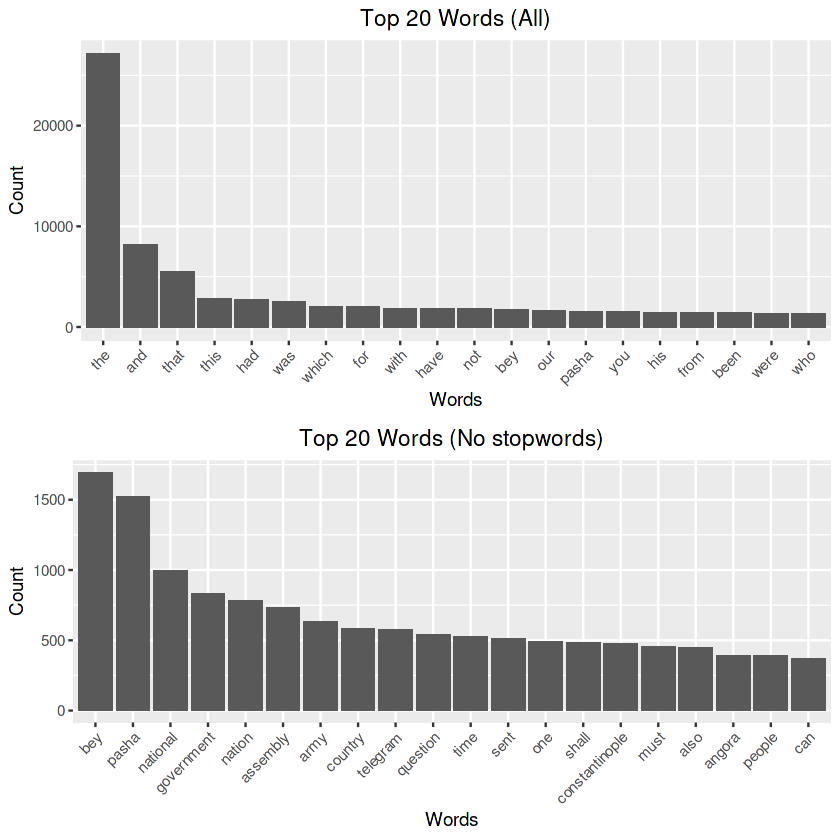

In [8]:
ngram_barplot <- function(df, title){
  dfsub <- subset(df[1:20,])
  ggplot(dfsub, aes(x = reorder(word, -freq), y = freq)) +
    geom_bar(stat = "identity") + 
    labs(x = "Words", y = "Count", title = title) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5))
}

onegram_barplot <- ngram_barplot(onegram_freqdf,"Top 20 Words (All)")
onegramNS_barplot <- ngram_barplot(onegramNS_freqdf,"Top 20 Words (No stopwords)")


grid.arrange(onegram_barplot, onegramNS_barplot, ncol = 1)

In [9]:
tdm <- TermDocumentMatrix(text_corpus_no_stopwords)
tdm <- as.matrix(tdm)
tdm[1:10, 1:20]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
ghazi,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
kemal,1,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,1,0
mustapha,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
pasha,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,3,0
delivered,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
president,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
republic,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
speech,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
turkish,0,0,1,0,0,0,0,0,0,0,2,0,1,0,2,0,0,0,0,0
october,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


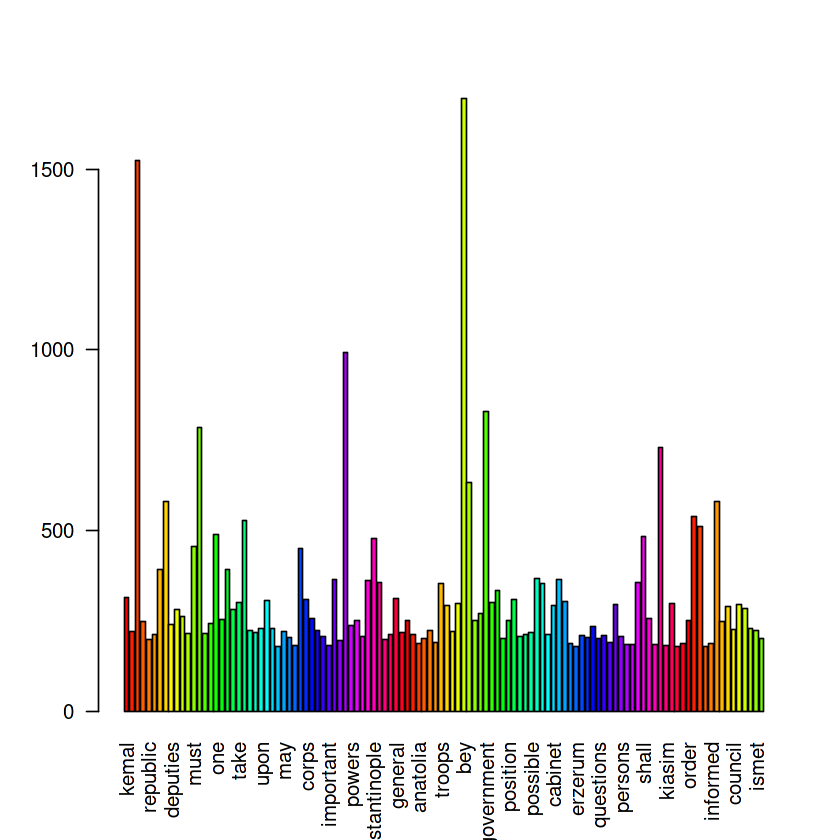

In [10]:
w <- rowSums(tdm)
w <- subset(w, w>=180)

barplot(w,
        las = 2,
        col = rainbow(50))


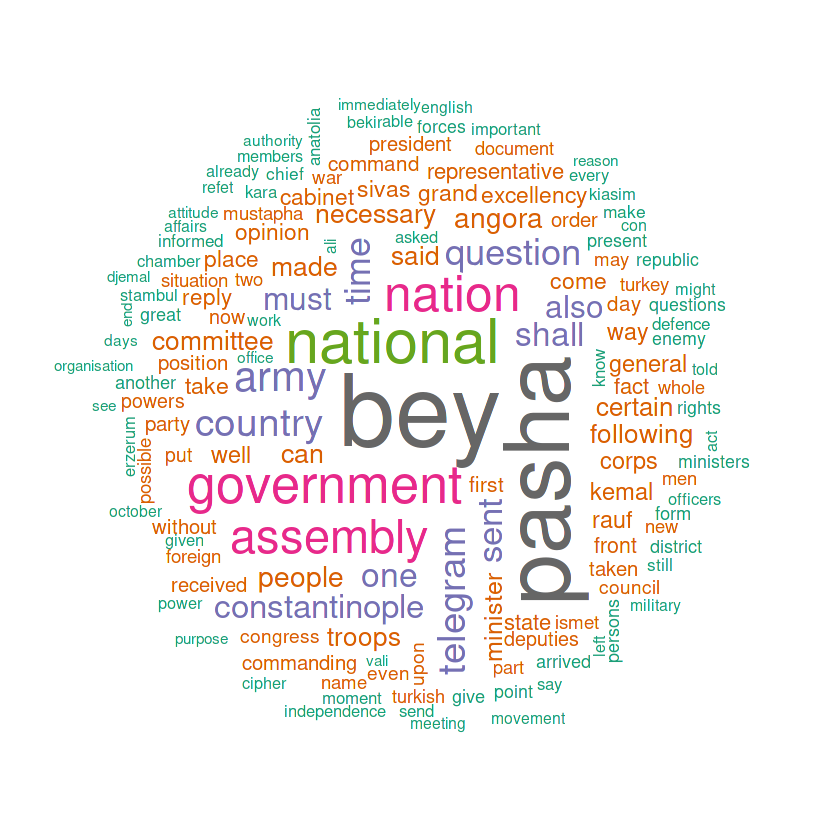

In [11]:

w <- sort(rowSums(tdm), decreasing = TRUE)
set.seed(222)
wordcloud(words = names(w),
          freq = w,
          max.words = 150,
          random.order = F,
          min.freq = 5,
          colors = brewer.pal(8, 'Dark2'),
          scale = c(5, 0.3))

<a id = "5"></a><br>
# 5. Sentiment Analysis

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,neutral
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,1,2,0
4,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,1


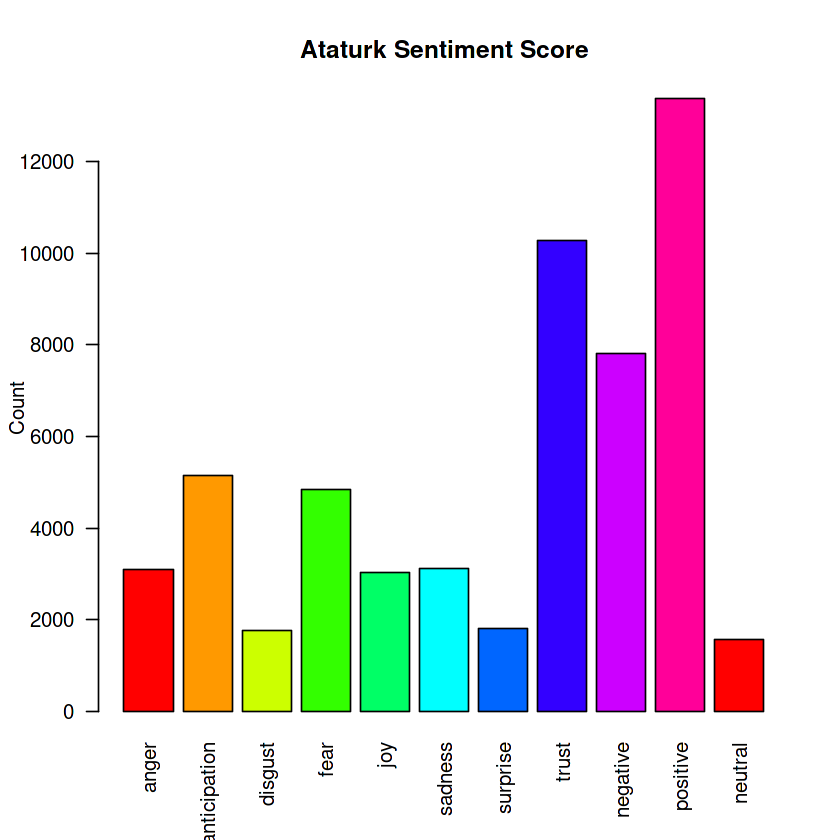

In [12]:
s <- get_nrc_sentiment(data, language = "english")
s$neutral <- ifelse(s$negative+s$positive==0, 1, 0)
head(s)

barplot(colSums(s),
        las = 2,
        col = rainbow(10),
        ylab = 'Count',
        main = 'Ataturk Sentiment Score')

<a id = "6"></a><br>
# 6. Topic Modeling

In [13]:
nutuk <- data

In [14]:
toks_nutuk <- tokens(nutuk, remove_punct = TRUE, remove_numbers = TRUE, remove_symbol = TRUE)
toks_nutuk <- tokens_remove(toks_nutuk, pattern = c(stopwords("en"), "*-time", "updated-*"))
dfmat_nutuk <- dfm(toks_nutuk) %>% 
              dfm_trim(min_termfreq = 0.8, termfreq_type = "quantile",
                       max_docfreq = 0.1, docfreq_type = "prop")

In [15]:
nutuk_lda <- textmodel_lda(dfmat_nutuk, k = 10)

In [16]:
terms(nutuk_lda, 10)

topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
troops,rauf,committee,minister,party,corps,kemal,powers,state,can
front,republic,representative,cabinet,certain,sivas,excellency,peace,people,situation
command,president,deputies,war,people,commanding,reply,turkey,caliph,possible
enemy,said,congress,october,organisation,vali,mustapha,foreign,world,way
district,ministers,chamber,djemal,formed,september,angora,conference,turkish,opinion
forces,following,rights,grand,men,rd,received,entente,caliphate,whether
edhem,ismet,defence,interior,work,kiasim,following,questions,power,know
general,council,sivas,ministry,made,erzerum,signed,delegation,turkey,might
attack,form,place,general,organisations,officers,telegraph,mandate,independence,present
men,law,members,majesty,important,bekir,cipher,smyrna,existence,fact


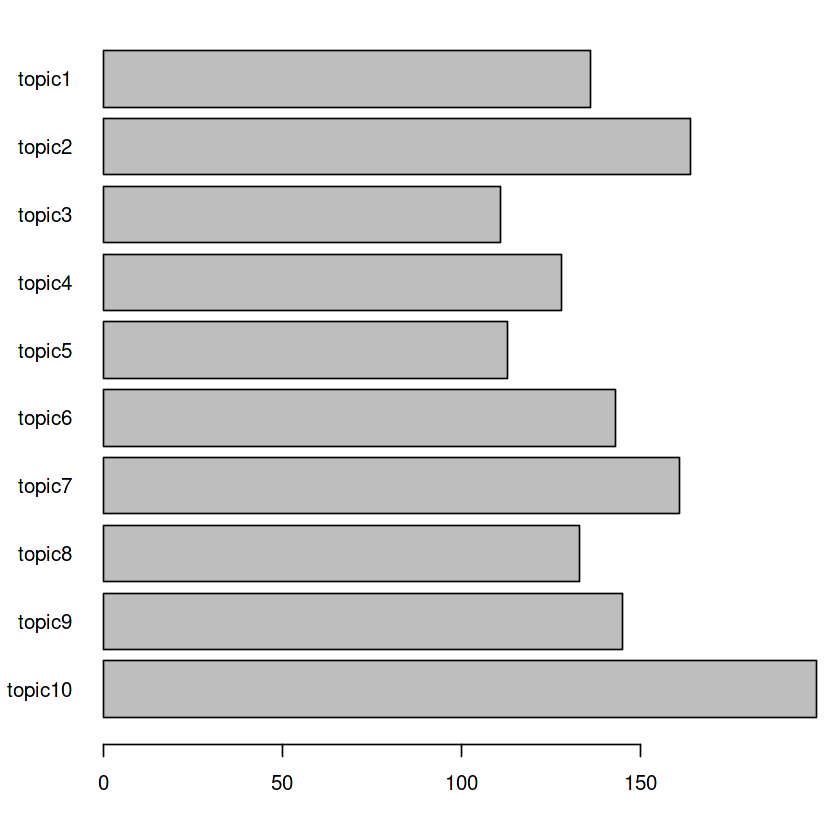

In [17]:
par(mar = c(4, 4, 1, 1))
barplot(rev(table(topics(nutuk_lda))), horiz = TRUE, las = 1)

<a id = "7"></a><br>
# 7. References
* https://en.wikipedia.org/wiki/Republic_Day_(Turkey)
* https://en.wikipedia.org/wiki/Mustafa_Kemal_Atat%C3%BCrk
* https://rstudio-pubs-static.s3.amazonaws.com/231095_0e6f05290f3b4f82bba74f97edb31744.html